In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

VPRM_old_or_new = "migli"
version = "V12"
region = "Europe" #  "Alps" or  "Europe"

R2_lt_zero = True # test so see results for R2_lt_zero - default: True (deletes sites below zero R2) 

run_ID = region+"_VPRM_optimized_params_diff_evo_"+version+"_100"
base_path = "/home/madse/Downloads/Fluxnet_Data/all_tuned_params/" + run_ID 

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith(VPRM_old_or_new+'_diff_evo_'+version+'_100.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)


In [183]:
base_path

'/home/madse/Downloads/Fluxnet_Data/all_tuned_params/Europe_VPRM_optimized_params_diff_evo_V12_100'

In [184]:

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith(VPRM_old_or_new+'_diff_evo_'+version+'_100.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)


In [185]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [186]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

df_parameters_nn = df_parameters.copy()
df_parameters_nn = df_parameters_nn.dropna()
font_size = 12
color_palette = sns.color_palette('bright')
pft_colors = {
    'CRO': color_palette[8], 
    'DBF': color_palette[0], 
    'ENF': color_palette[9],
    'MF': color_palette[4], 
    'GRA': color_palette[2],     
    'SHB': color_palette[7],
    'WET': color_palette[3]
}



In [187]:
df_parameters_nn = df_parameters_nn[df_parameters_nn["Topt"] < 1 ]

print(df_parameters_nn["Topt"]-df_parameters_nn["T_mean"])

Series([], dtype: float64)


In [188]:
if R2_lt_zero:
    print(f"Number of deleted site years due to R2_NEE < 0 = {sum(df_parameters['R2_NEE'] < 0)}")
    df_parameters = df_parameters[df_parameters["R2_NEE"] > 0]
    df_parameters.reset_index(drop=True, inplace=True)
    str_R2_lt_zero = ""
else:
    print(f"Number of deleted site years due to R2_NEE > 0 = {sum(df_parameters['R2_NEE'] < 0)}")
    df_parameters = df_parameters[df_parameters["R2_NEE"] < 0]
    df_parameters.reset_index(drop=True, inplace=True)
    str_R2_lt_zero = "_R2_lt_zero"


Number of deleted site years due to R2_NEE < 0 = 68


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

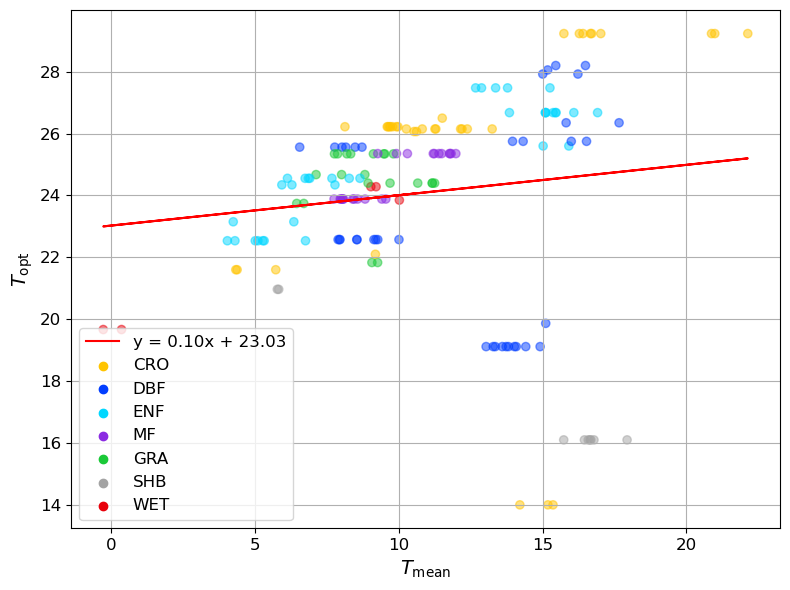

In [189]:

font_size = 12
plt.figure(figsize=(8, 6))
plt.scatter(df_parameters["T_mean"], df_parameters["Topt"], alpha=0.5, c=df_parameters["PFT"].map(pft_colors))
coefficients = np.polyfit(df_parameters["T_mean"], df_parameters["Topt"], 1)
poly = np.poly1d(coefficients)
plt.plot(df_parameters["T_mean"], poly(df_parameters["T_mean"]), color='red', label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
equation_regression = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
equation_normal = 'y = x'
plt.xlabel(r'$T_{\mathrm{mean}}$',fontsize=font_size+2)
plt.ylabel(r'$T_{\mathrm{opt}}$',fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)

for pft, color in pft_colors.items():
    plt.scatter([], [], c=color, label=pft)  # Create an empty scatter plot for each PFT label

plt.legend(fontsize=font_size)
plt.tight_layout()
plt.savefig(
    base_path 
    + "/regression_Topt_vs_Tmean_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

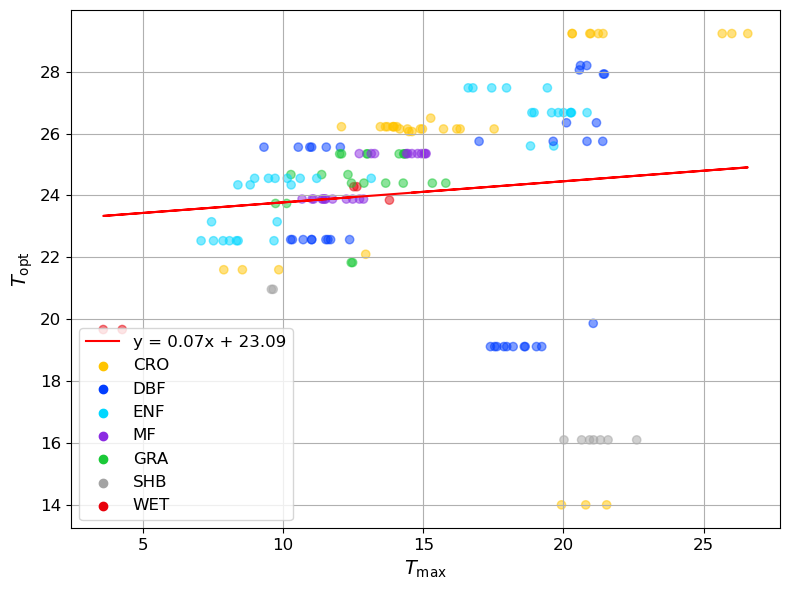

In [190]:


plt.figure(figsize=(8, 6))
plt.scatter(df_parameters["T_max"].dropna(), df_parameters["Topt"].dropna(), alpha=0.5, c=df_parameters["PFT"].map(pft_colors))
coefficients = np.polyfit(df_parameters["T_max"], df_parameters["Topt"], 1)
poly = np.poly1d(coefficients)
plt.plot(df_parameters["T_max"], poly(df_parameters["T_max"]), color='red', label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
equation_regression = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
equation_normal = 'y = x'
plt.xlabel(r'$T_{\mathrm{max}}$',fontsize=font_size+2)
plt.ylabel(r'$T_{\mathrm{opt}}$',fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.grid(True)

for pft, color in pft_colors.items():
    plt.scatter([], [], c=color, label=pft)  # Create an empty scatter plot for each PFT label

plt.legend(fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/regression_Topt_vs_Tmax_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

In [191]:
if VPRM_old_or_new == "new":
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha1",
        "alpha2",
        "beta",
        "T_crit",
        "T_mult",
        "gamma",
        "theta1",
        "theta2",
        "theta3",
    ]
elif VPRM_old_or_new == "old":
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha",
        "beta",
    ]
elif VPRM_old_or_new == "migli": 
    parameters_to_plot = [
                "RLAI",
                "alphaLAI",
                "k2",
                "E0(K)",
                "alpha_p",
                "K (mm)",
                "PAR0",
                "lambd",            
    ]

In [192]:
# Define the color palette and the PFT color mapping

df_parameters.sort_values(by="PFT", inplace=True)
color_palette = sns.color_palette('bright')
# Create a list of colors for the boxplot based on the sorted PFTs
pft_order = df_parameters['PFT'].unique()
colors = [pft_colors[pft] for pft in pft_order]


In [193]:
df_parameters

,site_ID,PFT,Year,Topt,PAR0,lambd,RLAI,alphaLAI,k2,E0(K),...,RMSE_GPP,RMSE_Reco,RMSE_NEE,AIC,NSE_NEE,T_mean,T_max,lat,lon,elev
164,DE-Seh,CRO,2009,26.066667,787.275060,0.111180,-1.871777,0.685129,0.294581,194.066000,...,4.002547,2.203455,4.045785,21.222470,0.595473,10.532465,14.600042,50.8706,6.4497,"103,000000"
136,FI-Jok,CRO,2001,21.600000,511.046591,0.068861,1.984563,0.225944,0.686996,194.066000,...,0.850367,1.911304,0.900945,24.226443,0.823321,4.336808,7.886537,60.8986,23.5135,"109,000000"
135,FI-Jok,CRO,2000,21.600000,331.741207,0.060382,0.477369,0.257779,0.755961,137.427415,...,0.587691,0.956667,0.651380,24.875146,0.560572,5.726298,9.847766,60.8986,23.5135,"109,000000"
57,IT-CA2,CRO,2013,14.000000,821.620640,0.099018,0.151020,0.670014,0.582370,145.314390,...,2.369194,1.935844,2.441660,22.232465,0.838621,14.212600,19.929312,42.3772,12.0260,"200,000000"
58,IT-CA2,CRO,2014,14.000000,560.518698,0.099910,1.088066,0.717038,0.790000,167.909505,...,2.411470,2.076251,2.550543,22.145209,0.757941,15.365138,20.795218,42.3772,12.0260,"200,000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,DE-Akm,WET,2010,24.283333,613.469043,0.168074,2.280956,0.020069,0.641875,194.066000,...,1.549514,3.410527,1.654386,23.010962,0.893306,9.031963,12.524136,53.8662,13.6834,"-1,000000"
55,DE-Akm,WET,2013,24.283333,1074.486446,0.154855,2.615688,0.302697,0.372926,190.947411,...,3.418532,4.558001,3.530865,21.494736,0.788845,9.212957,12.633014,53.8662,13.6834,"-1,000000"
11,DE-Zrk,WET,2014,23.850000,370.574105,0.133356,-1.115299,0.489800,0.725455,127.303800,...,1.357218,2.204866,1.580432,23.102425,0.651915,10.023384,13.793975,53.8759,12.8890,"0,000000"
81,FI-Lom,WET,2007,19.666667,290.346086,0.295716,0.631799,0.039536,0.410843,156.244175,...,0.888016,1.259671,0.925147,24.173426,0.796907,0.364357,4.264619,67.9972,24.2092,"274,000000"


/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

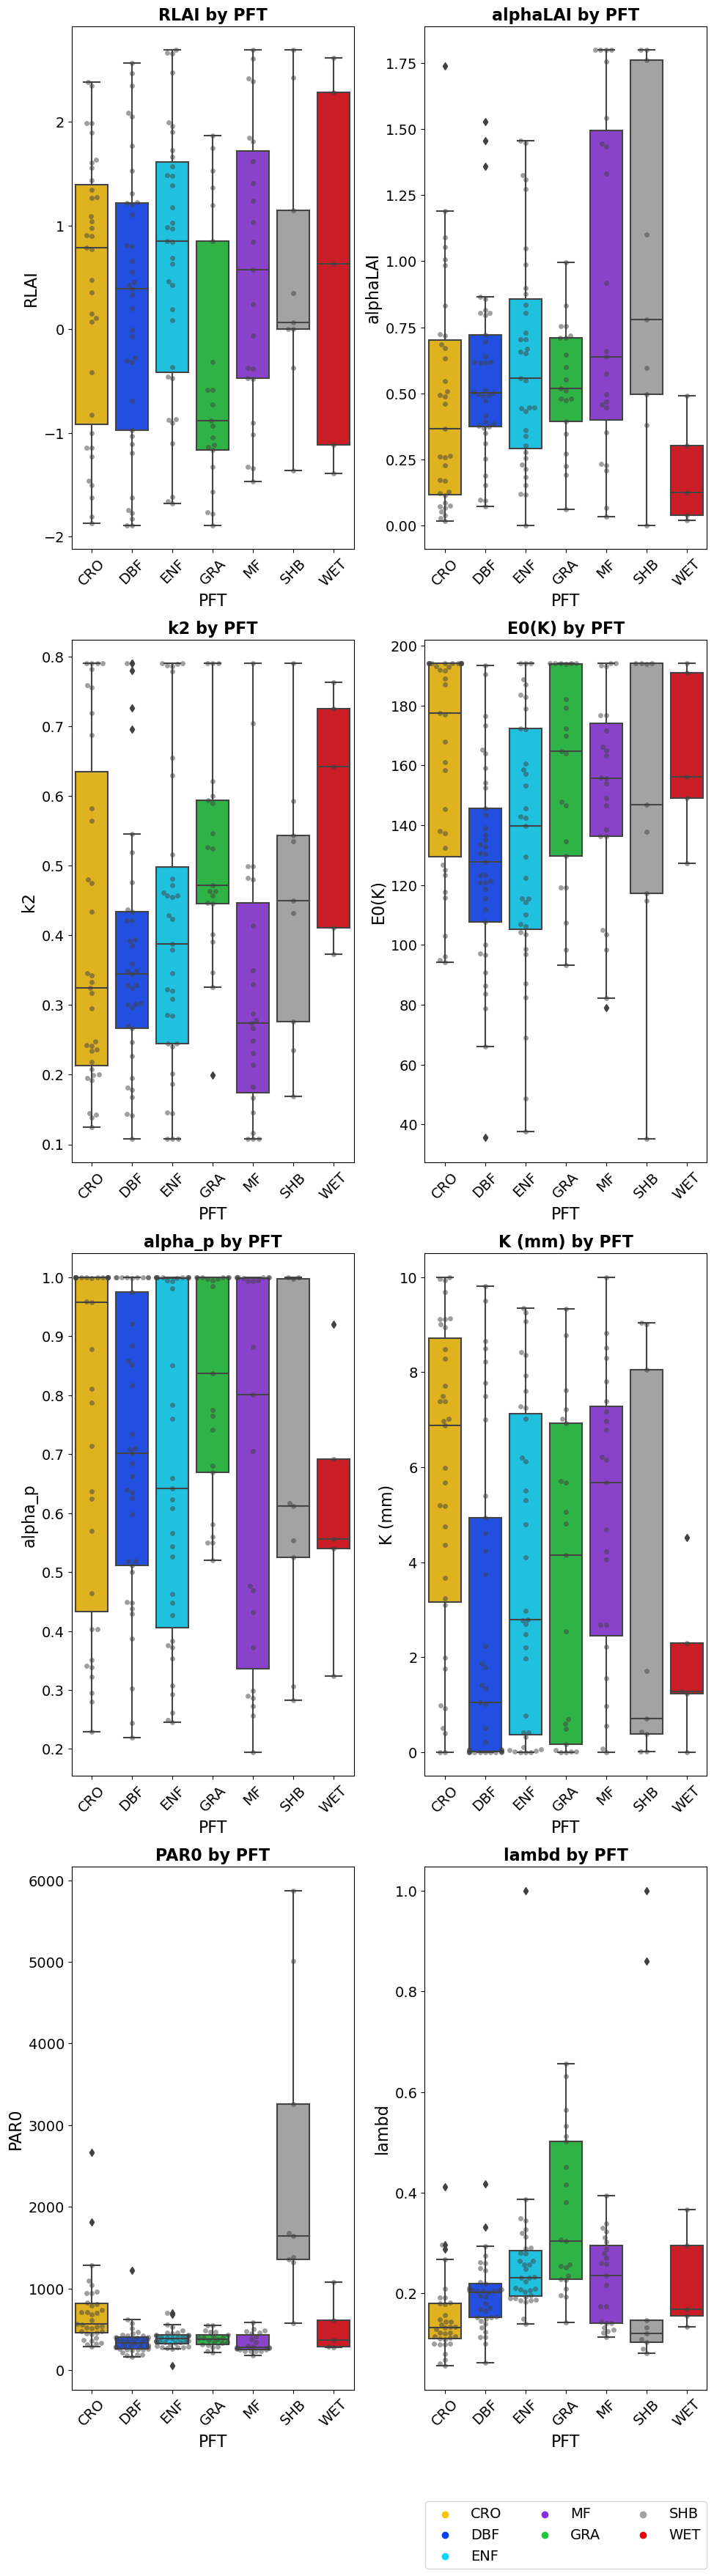

In [194]:

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    font_size = 12
elif VPRM_old_or_new == "old":
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
    font_size = 14
elif VPRM_old_or_new == "migli":    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 35))
    font_size = 14

axes = axes.flatten()
for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i],palette=colors) 
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT',fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('PFT',fontsize=font_size+2)
    axes[i].set_ylabel(parameter,fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)



handles = []
for pft, color in pft_colors.items():
    handles.append(plt.scatter([], [], c=color, label=pft))

plt.legend(handles=handles, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(pft_colors)//2, fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/boxplot_PFTs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

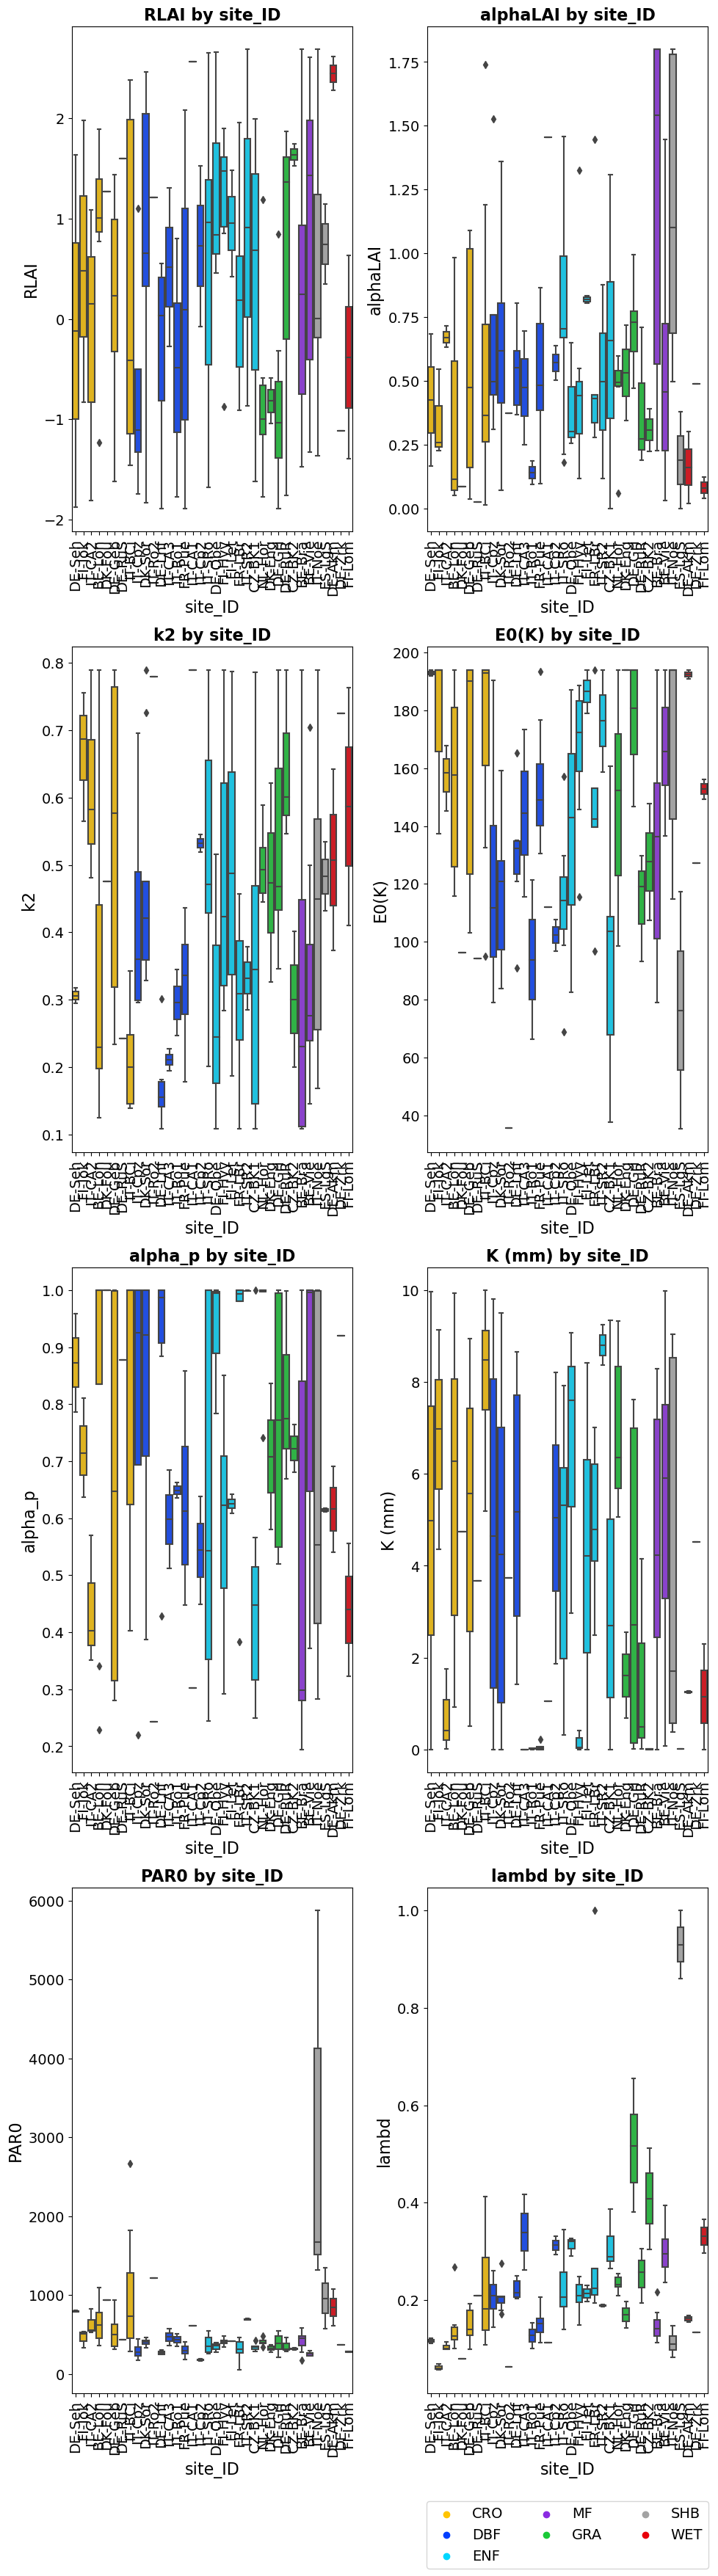

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary mapping site_ID to PFT
site_to_pft = df_parameters.set_index('site_ID')['PFT'].to_dict()

# Create a list of colors for each site based on the PFT
site_colors = [pft_colors[site_to_pft[site]] for site in df_parameters['site_ID'].unique()]

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
elif VPRM_old_or_new == "old":
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
    font_size = 14
elif VPRM_old_or_new == "migli":    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 35))
    font_size = 14
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='site_ID', y=parameter, data=df_parameters, ax=axes[i], palette=site_colors)
    #sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, color="0.15", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by site_ID', fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('site_ID', fontsize=font_size+2)
    axes[i].set_ylabel(parameter, fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)
    if VPRM_old_or_new == "new":
        axes[i].tick_params(axis='x', which='major', labelsize=font_size-5)

# Create legend handles
handles = []
for pft, color in pft_colors.items():
    handles.append(plt.scatter([], [], c=color, label=pft))

plt.legend(handles=handles, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(pft_colors)//2, fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_siteIDs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


In [196]:
grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_params_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".xlsx", index=False)

In [197]:

# Pivoting the DataFrame
pivoted_mean = mean_median_df.pivot(index='Parameter', columns='PFT', values='Mean')
pivoted_median = mean_median_df.pivot(index='Parameter', columns='PFT', values='Median')

# Exporting to CSV
pivoted_mean.to_csv(base_path + "/"+region+"_parameters_mean_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".csv")
pivoted_median.to_csv(base_path + "/"+region+"_parameters_median_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".csv")

/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The P

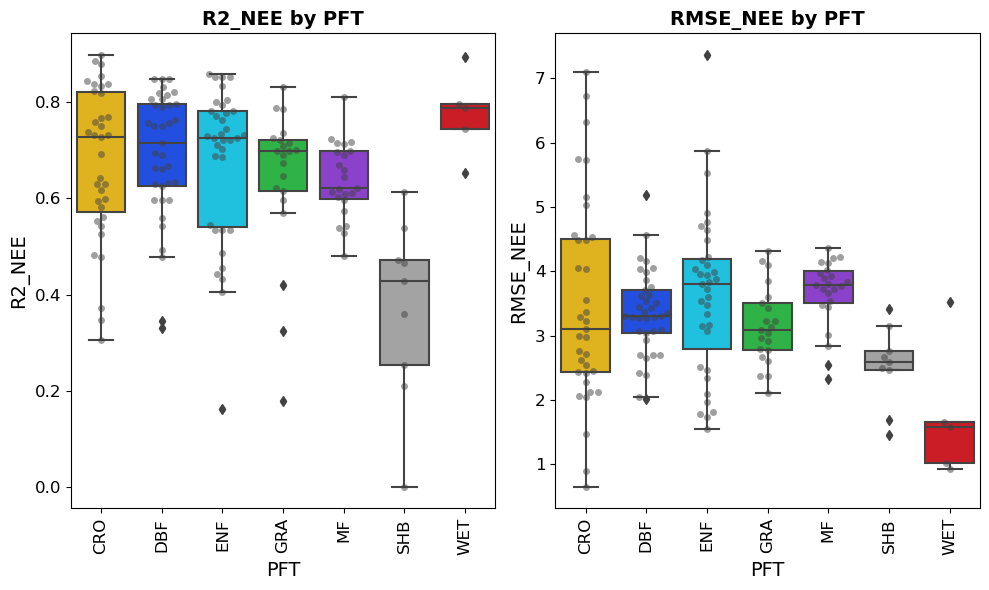

In [198]:

parameters_to_plot = ['R2_GPP', 'R2_Reco', 'R2_NEE', 'RMSE_GPP', 'RMSE_Reco', 'RMSE_NEE']
font_size = font_size-2
grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_R2_RMSE_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".xlsx", index=False)

parameters_to_plot = [ 'R2_NEE', 'RMSE_NEE']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i],palette=colors)
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT', fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('PFT', fontsize=font_size+2)
    axes[i].set_ylabel(parameter, fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_R2_RMSE_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)